In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('/content/drive/Shareddrives/과학기술일자리진흥원_은채/지식재산연구원 논문/심사의견서_머신러닝_동향분석/Full_data_18_3.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sumbmityear         11448 non-null  int64  
 1   projectnumber       11448 non-null  int64  
 2   projectnm           11448 non-null  object 
 3   sixtechnologylarge  11439 non-null  object 
 4   사업화유무               11448 non-null  object 
 5   applicationnumber   11448 non-null  int64  
 6   title               11448 non-null  object 
 7   reckonedexpiryterm  11448 non-null  float64
 8   pqi_grade           11448 non-null  object 
 9   pqi                 11448 non-null  float64
 10  grade               11448 non-null  object 
 11  score               11448 non-null  float64
 12  CountryCounts       11448 non-null  int64  
 13  claim_cnt           11448 non-null  float64
 14  예측분류                11448 non-null  object 
 15  기술이전유무              11448 non-null  object 
 16  ipc 

In [5]:
moore_lm = ols('pqi ~ C(예측분류_L) + ipc_cnt + topic_prob', data=data).fit()

In [6]:
anova_lm(moore_lm, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,592.732359,1.0,7107.224183,0.000000e+00
C(예측분류_L),8.545227,5.0,20.492502,1.982654e-20
ipc_cnt,0.720232,1.0,8.636021,3.302388e-03
topic_prob,1.169938,1.0,14.028274,1.809662e-04
Residual,954.079682,11440.0,NaN,NaN


In [7]:
anova_lm(moore_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(예측분류_L),5.0,17.458575,3.491715,41.867802,7.147383e-43
ipc_cnt,1.0,0.735533,0.735533,8.819490,2.986486e-03
topic_prob,1.0,1.169938,1.169938,14.028274,1.809662e-04
Residual,11440.0,954.079682,0.083399,NaN,NaN


In [8]:
data.예측분류_L

0        2
1        3
2        3
3        3
4        0
        ..
11443    2
11444    0
11445    0
11446    0
11447    3
Name: 예측분류_L, Length: 11448, dtype: int64

In [10]:
from statsmodels.multivariate.manova import MANOVA
maov=MANOVA.from_formula('pqi + score + ipc_cnt ~ C(예측분류_L)', data=data)
print(maov.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0740 3.0000 11440.0000 47744.2517 0.0000
         Pillai's trace  0.9260 3.0000 11440.0000 47744.2517 0.0000
 Hotelling-Lawley trace 12.5203 3.0000 11440.0000 47744.2517 0.0000
    Roy's greatest root 12.5203 3.0000 11440.0000 47744.2517 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
         C(예측분류_L)        Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda 0.8649 15.0000 31581.2039 113.6964 0.0000
 

In [11]:
maov=MANOVA.from_formula('pqi + score + ipc_cnt ~ 예측분류', data=data)
print(maov.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0740 3.0000 11440.0000 47744.2517 0.0000
         Pillai's trace  0.9260 3.0000 11440.0000 47744.2517 0.0000
 Hotelling-Lawley trace 12.5203 3.0000 11440.0000 47744.2517 0.0000
    Roy's greatest root 12.5203 3.0000 11440.0000 47744.2517 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
            예측분류          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda 0.8649 15.0000 31581.2039 113.6964 0.0000
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


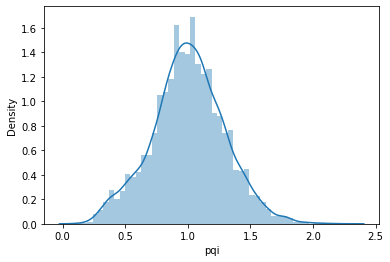

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['pqi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


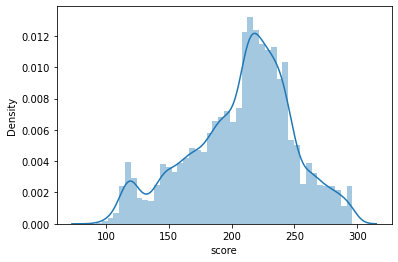

In [13]:
sns.distplot(data['score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


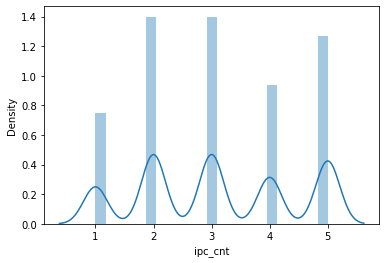

In [14]:
sns.distplot(data['ipc_cnt'])

In [15]:
maov=MANOVA.from_formula('pqi + score + ipc_cnt ~ 예측분류', data=data)
print(maov.mv_test())

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0740 3.0000 11440.0000 47744.2517 0.0000
         Pillai's trace  0.9260 3.0000 11440.0000 47744.2517 0.0000
 Hotelling-Lawley trace 12.5203 3.0000 11440.0000 47744.2517 0.0000
    Roy's greatest root 12.5203 3.0000 11440.0000 47744.2517 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
            예측분류          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
            Wilks' lambda 0.8649 15.0000 31581.2039 113.6964 0.0000
 

1. 독립성 - random sampling 진행

In [54]:
data[['projectnumber','예측분류']].groupby('예측분류').agg(len)

,projectnumber
예측분류,
BT(생명공학기술),3001
CT(문화기술),274
ET(환경기술),3123
IT(정보기술),3377
NT(나노기술),1415
ST(우주항공기술),258


In [55]:
def gpSampling(data, group, group_N, random_num=123) :
        
    import pandas as pd

    df_data_sp = data.sample(frac=1,random_state=random_num,replace = False).groupby(by = group).head(group_N) # group에 따라 일정 개수의 샘플을 복원 추출하여 사용한다.

    return df_data_sp

In [56]:
data_sampled = gpSampling(data, '예측분류', 300)

2. 정규성 만족

In [57]:
set(data_sampled['예측분류'])

{'BT(생명공학기술)', 'CT(문화기술)', 'ET(환경기술)', 'IT(정보기술)', 'NT(나노기술)', 'ST(우주항공기술)'}

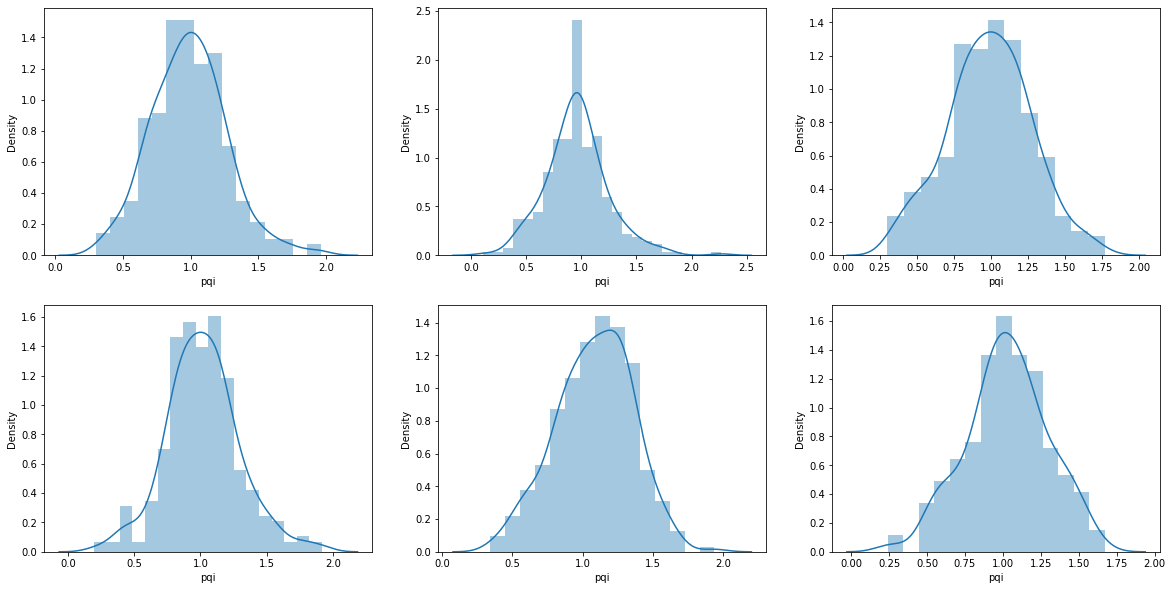

In [58]:
f,axes = plt.subplots(2,3, figsize=(20,10))

sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='CT(문화기술)'], ax=axes[0,0])
sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='BT(생명공학기술)'], ax=axes[0,1])
sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='ET(환경기술)'], ax=axes[0,2])
sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='IT(정보기술)'], ax=axes[1,0])
sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='NT(나노기술)'], ax=axes[1,1])
sns.distplot(data_sampled['pqi'][data_sampled['예측분류']=='ST(우주항공기술)'], ax=axes[1,2])

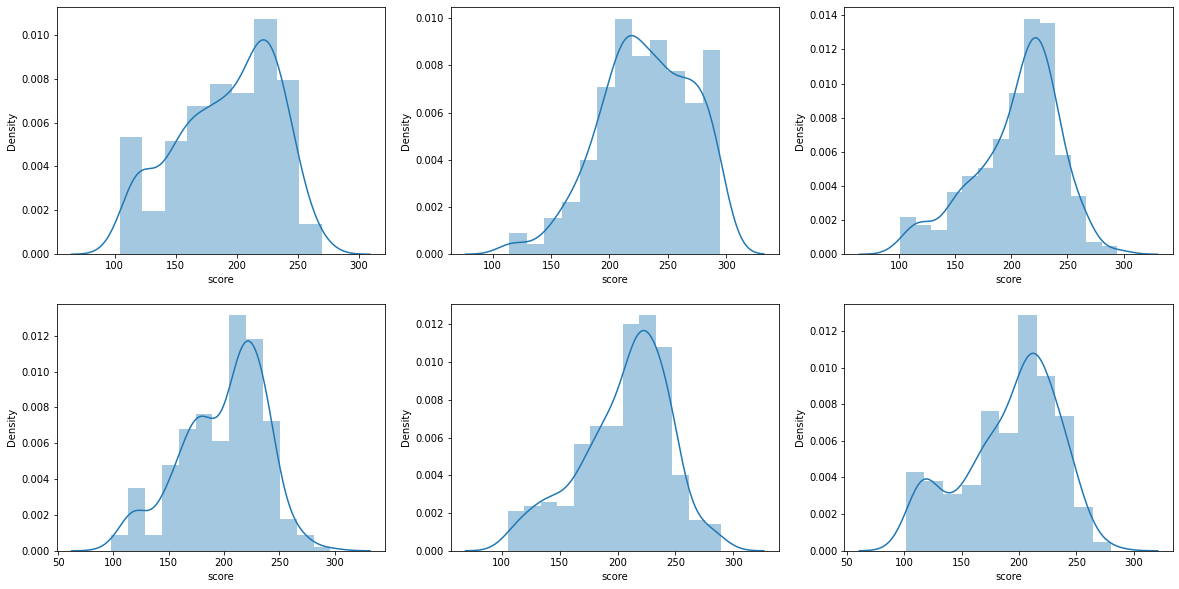

In [59]:
f,axes = plt.subplots(2,3, figsize=(20,10))

sns.distplot(data_sampled['score'][data_sampled['예측분류']=='CT(문화기술)'], ax=axes[0,0])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='BT(생명공학기술)'], ax=axes[0,1])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='ET(환경기술)'], ax=axes[0,2])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='IT(정보기술)'], ax=axes[1,0])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='NT(나노기술)'], ax=axes[1,1])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='ST(우주항공기술)'], ax=axes[1,2])

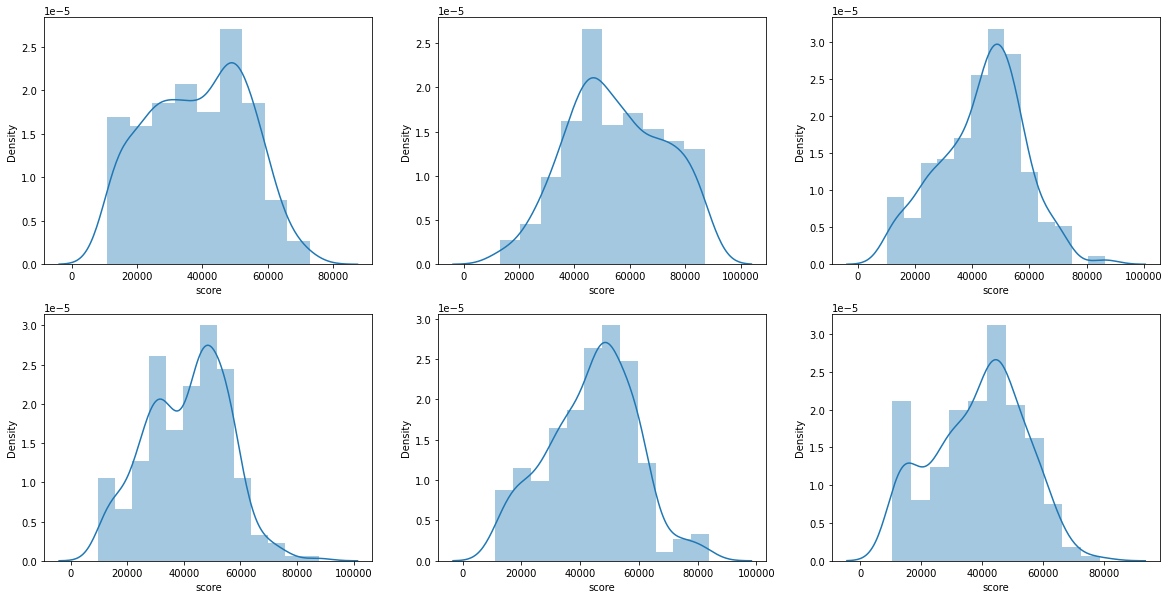

In [60]:
f,axes = plt.subplots(2,3, figsize=(20,10))

sns.distplot(data_sampled['score'][data_sampled['예측분류']=='CT(문화기술)']**2, ax=axes[0,0])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='BT(생명공학기술)']**2, ax=axes[0,1])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='ET(환경기술)']**2, ax=axes[0,2])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='IT(정보기술)']**2, ax=axes[1,0])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='NT(나노기술)']**2, ax=axes[1,1])
sns.distplot(data_sampled['score'][data_sampled['예측분류']=='ST(우주항공기술)']**2, ax=axes[1,2])

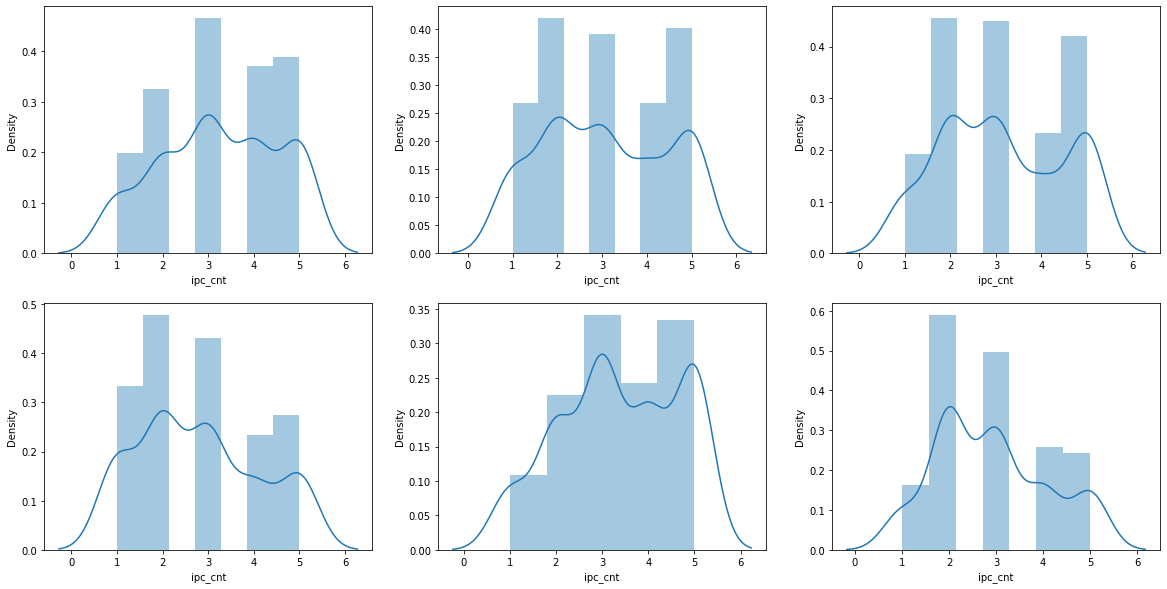

In [61]:
f,axes = plt.subplots(2,3, figsize=(20,10))

sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='CT(문화기술)'], ax=axes[0,0])
sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='BT(생명공학기술)'], ax=axes[0,1])
sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='ET(환경기술)'], ax=axes[0,2])
sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='IT(정보기술)'], ax=axes[1,0])
sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='NT(나노기술)'], ax=axes[1,1])
sns.distplot(data_sampled['ipc_cnt'][data_sampled['예측분류']=='ST(우주항공기술)'], ax=axes[1,2])

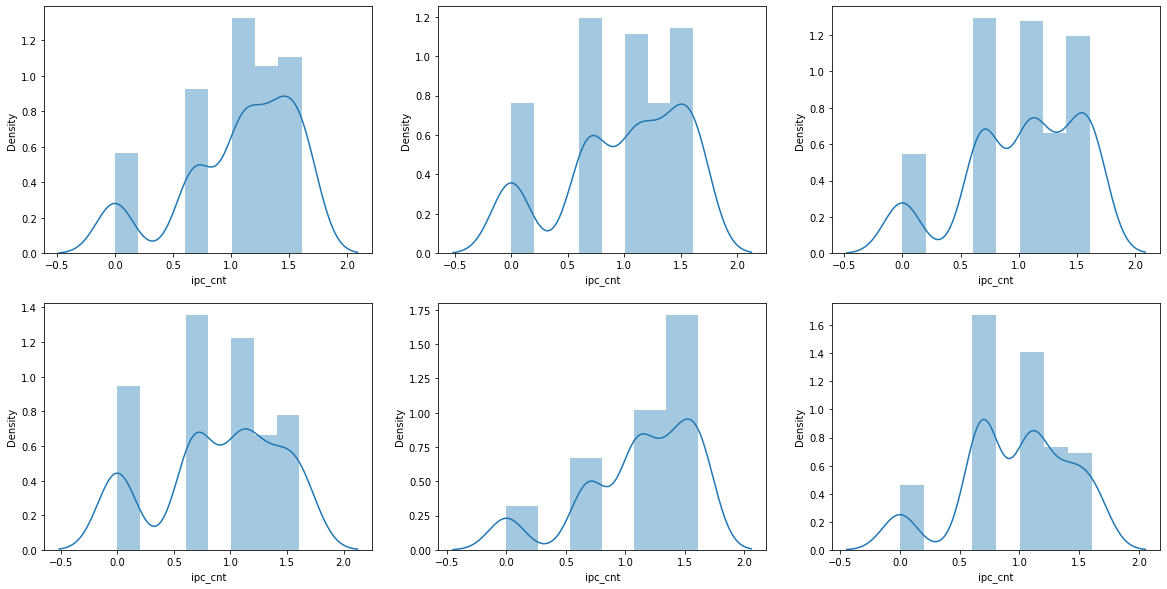

In [71]:
import numpy as np

f,axes = plt.subplots(2,3, figsize=(20,10))

sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='CT(문화기술)']), ax=axes[0,0])
sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='BT(생명공학기술)']), ax=axes[0,1])
sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='ET(환경기술)']), ax=axes[0,2])
sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='IT(정보기술)']), ax=axes[1,0])
sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='NT(나노기술)']), ax=axes[1,1])
sns.distplot(np.log(data_sampled['ipc_cnt'][data_sampled['예측분류']=='ST(우주항공기술)']), ax=axes[1,2])

In [62]:
data_sampled['score_2']=[x**2 for x in data_sampled['score']]

3. 등분산성

In [63]:
import scipy

In [69]:
scipy.stats.levene(
    data_sampled.score[data_sampled.예측분류 == 'CT(문화기술)'],
    data_sampled.score[data_sampled.예측분류 == 'BT(생명공학기술)'],
    data_sampled.score[data_sampled.예측분류 == 'ET(환경기술)'],
    data_sampled.score[data_sampled.예측분류 == 'IT(정보기술)'],
    data_sampled.score[data_sampled.예측분류 == 'NT(나노기술)'],
    data_sampled.score[data_sampled.예측분류 == 'ST(우주항공기술)'],)

LeveneResult(statistic=1.7932490047476697, pvalue=0.11104264617427342)

In [65]:
scipy.stats.levene(
    data_sampled.pqi[data_sampled.예측분류 == 'CT(문화기술)'],
    data_sampled.pqi[data_sampled.예측분류 == 'BT(생명공학기술)'],
    data_sampled.pqi[data_sampled.예측분류 == 'ET(환경기술)'],
    data_sampled.pqi[data_sampled.예측분류 == 'IT(정보기술)'],
    data_sampled.pqi[data_sampled.예측분류 == 'NT(나노기술)'],
    data_sampled.pqi[data_sampled.예측분류 == 'ST(우주항공기술)'],)

LeveneResult(statistic=0.3786895075055586, pvalue=0.8636019543573566)

In [66]:
scipy.stats.levene(
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'CT(문화기술)'],
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'BT(생명공학기술)'],
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'ET(환경기술)'],
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'IT(정보기술)'],
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'NT(나노기술)'],
    data_sampled.ipc_cnt[data_sampled.예측분류 == 'ST(우주항공기술)'],)

LeveneResult(statistic=2.222153514596622, pvalue=0.049724807710534724)

In [73]:
maov=MANOVA.from_formula('pqi + score + ipc_cnt ~ 예측분류', data=data_sampled)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.0985 3.0000 1724.0000 5261.2082 0.0000
         Pillai's trace 0.9015 3.0000 1724.0000 5261.2082 0.0000
 Hotelling-Lawley trace 9.1552 3.0000 1724.0000 5261.2082 0.0000
    Roy's greatest root 9.1552 3.0000 1724.0000 5261.2082 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           예측분류          Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8381 15.0000 4759.6063 20.9708 0.0000
          Pillai's trace 0.1670 15.0000 5178.

In [72]:
maov=MANOVA.from_formula('pqi + score ~ 예측분류', data=data_sampled)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.2215 2.0000 1725.0000 3031.3782 0.0000
         Pillai's trace 0.7785 2.0000 1725.0000 3031.3782 0.0000
 Hotelling-Lawley trace 3.5146 2.0000 1725.0000 3031.3782 0.0000
    Roy's greatest root 3.5146 2.0000 1725.0000 3031.3782 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           예측분류          Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.8502 10.0000 3450.0000 29.1684 0.0000
          Pillai's trace 0.1519 10.0000 3452.